Association rules

In [234]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [235]:
###########################################################

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
###########################################################

In [236]:
# regole generali

In [237]:
df = pd.read_csv("../../data/rules_supp20_conf60.csv")
df.shape
df_filtered = df.query('Lift>1')
df_filtered.describe()

             Supp        Conf        Lift
count  137.000000  137.000000  137.000000
mean     0.225547    0.805547    1.412628
std      0.069704    0.137915    0.464709
min      0.130000    0.600000    1.010000
25%      0.160000    0.670000    1.030000
50%      0.220000    0.830000    1.250000
75%      0.270000    0.920000    1.670000
max      0.480000    1.000000    2.660000

Text(0,0.5,u'Lift')

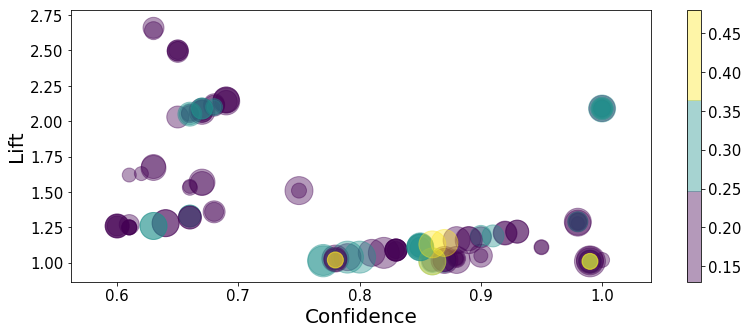

In [296]:
plt.figure(figsize=(13,5))
size= 10000*(df.Supp)**(2)
plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.4 ,c='Supp',cmap =plt.cm.get_cmap('viridis',3))
plt.colorbar()
#plt.colorbar(extend='both')
#plt.clim(0.2,1)
plt.xlabel('Confidence')
plt.ylabel('Lift')
#plt.legend()

In [297]:
df.query(" Conf>0.9 & Lift >1.7")

    Consequent                              Antecedent  Supp  Conf  Lift
92     high_SL  ('very good_LE', 'N_L', 'N_WA', 'N_P')  0.22   1.0  2.09
96     high_SL         ('very good_LE', 'N_L', 'N_WA')  0.23   1.0  2.09
100    high_SL          ('very good_LE', 'N_L', 'N_P')  0.27   1.0  2.09
103    high_SL                 ('very good_LE', 'N_L')  0.27   1.0  2.09
107    high_SL         ('very good_LE', 'N_WA', 'N_P')  0.27   1.0  2.09
110    high_SL                ('very good_LE', 'N_WA')  0.27   1.0  2.09
113    high_SL                 ('very good_LE', 'N_P')  0.31   1.0  2.09
115    high_SL                       ('very good_LE',)  0.32   1.0  2.09

In [522]:
variables = ['Time_Spend_Company',
            'Department',
            'Number_Projects',
            'Promotion_Last_5_Years',
            'Left',
            'Average_Montly_Hours',
            'Work_Accident',
            'Last_Evaluation',
            'Salary',
            'Satisfaction_Level']

other_columns = ['Antecedent','Consequent','Supp','Conf','Lift']

from copy import copy
columns = copy(variables)

for col in other_columns:
    columns.append(col)

df_empty = pd.DataFrame(columns=other_columns,index=np.arange(1))
df_empty.head()

  Antecedent Consequent Supp Conf Lift
0        NaN        NaN  NaN  NaN  NaN

In [506]:
var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list


item=df.Consequent[10]
item2dict(item)


{'Last_Evaluation': 'insufficient'}

In [507]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list

out= antecedent2list(df.Antecedent[40])
out


[{'Number_Projects': '3'}, {'Left': 'N'}, {'Promotion_Last_5_Years': 'N'}]

In [508]:
df_empty.head()

                                          Antecedent Consequent Supp Conf Lift
1   [{u'Time_Spend_Company': u'2'}, {u'Left': u'N'}]        NaN  NaN  NaN  NaN
2   [{u'Time_Spend_Company': u'2'}, {u'Left': u'N'}]        NaN  NaN  NaN  NaN
3  [{u'Time_Spend_Company': u'2'}, {u'Promotion_L...        NaN  NaN  NaN  NaN
4                    [{u'Time_Spend_Company': u'2'}]        NaN  NaN  NaN  NaN
5  [{u'Time_Spend_Company': u'2'}, {u'Promotion_L...        NaN  NaN  NaN  NaN

In [541]:
df_empty = pd.DataFrame(columns=other_columns,index=df.index)
df_empty.head()

for i,item in enumerate(df.Antecedent):
    df_empty.Antecedent[i]= antecedent2list(item)

for i,item in enumerate(df.Consequent):
    df_empty.Consequent[i]= item2dict(item)

    
#df_empty.Antecedent.head()

#df.shape == df_empty.shape
df_empty.head()

                                          Antecedent  \
0  [{u'Time_Spend_Company': u'2'}, {u'Left': u'N'...   
1   [{u'Time_Spend_Company': u'2'}, {u'Left': u'N'}]   
2   [{u'Time_Spend_Company': u'2'}, {u'Left': u'N'}]   
3  [{u'Time_Spend_Company': u'2'}, {u'Promotion_L...   
4                    [{u'Time_Spend_Company': u'2'}]   

                          Consequent Supp Conf Lift  
0           {u'Work_Accident': u'N'}  NaN  NaN  NaN  
1           {u'Work_Accident': u'N'}  NaN  NaN  NaN  
2  {u'Promotion_Last_5_Years': u'N'}  NaN  NaN  NaN  
3                    {u'Left': u'N'}  NaN  NaN  NaN  
4                    {u'Left': u'N'}  NaN  NaN  NaN  

In [552]:
def df2df_list(df):
    df_new = df.copy()

    for i,item in enumerate(df.Antecedent):
        df_new.Antecedent[i]= antecedent2list(item)

    for i,item in enumerate(df.Consequent):
        df_new.Consequent[i]= item2dict(item)

    return df_new        

prova = df2df_list(df)


In [244]:
## parte antecedente
tupla_antecedent = df.Antecedent[0]




"('2_T', 'N_L', 'N_P')"

In [233]:
df_empty.head()

  Time_Spend_Company Department Number_Projects Promotion_Last_5_Years Left  \
1                NaN        NaN             NaN                    NaN  NaN   
2                NaN        NaN             NaN                    NaN  NaN   
3                NaN        NaN             NaN                    NaN  NaN   
4                NaN        NaN             NaN                    NaN  NaN   
5                NaN        NaN             NaN                    NaN  NaN   

  Average_Montly_Hours Work_Accident Last_Evaluation Salary  \
1                  NaN           NaN             NaN    NaN   
2                  NaN           NaN             NaN    NaN   
3                  NaN           NaN             NaN    NaN   
4                  NaN           NaN             NaN    NaN   
5                  NaN           NaN             NaN    NaN   

  Satisfaction_Level       Post_var Post_value Supp Conf Lift  
1                NaN  Work_Accident          N  NaN  NaN  NaN  
2                N

In [ ]:
df_rules.query('Lift>2').shape
df_rules.query('Lift>2')


df_rules.describe()


df_rules.query('(Consequent=="Y_L") or ("Y_L" in Antecedent) ').shape
df_rules.query('(Consequent=="Y_L") or ("Y_L" in Antecedent) ').describe()

df_rules.query('(Consequent=="Y_L") or ("Y_L" in Antecedent) ').head(40)

df_rules.query('(Consequent=="Y_L") or ("Y_L" in Antecedent) ').sort_values(by=['Supp'],ascending=False)

import matplotlib.pyplot as plt
%matplotlib qt
plt.scatter('Lift','Supp',data=df_rules)
df_rules.query('(Consequent=="Y_L") ').
df_rules.query('(Consequent=="Y_L") & (Lift>1) ').shape
df_rules.query('(Consequent=="Y_L") & (Lift>4) ')
df_rules.head(50).shape
df_rules.to_csv("prova.csv")





df_rules.shape
